In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [75]:
df_without_mode = pd.read_csv('./nn/nn_NSC3km-12sec.default.rpt_40km_2hr.1024n.ep10.f01-f48.bs1024.1layer.SGD.L20.01.lr0.01.0.0.1fold.scores.txt')
df_with_mode = pd.read_csv('./nn/nn_NSC3km-12sec.with_CNN_DNN_storm_mode_nprob.rpt_40km_2hr.1024n.ep10.f01-f48.bs1024.1layer.SGD.L20.01.lr0.01.0.0.1fold.scores.txt',header=0)

df_with_mode_qlcs_area = pd.read_csv('./nn/nn_NSC3km-12sec.with_CNN_DNN_storm_mode_nprob.rpt_40km_2hr.1024n.ep10.f01-f48.bs1024.1layer.SGD.L20.01.lr0.01.0.0.1fold.DNN_1_QLCS_nprob0.1.scores.txt',header=0)
df_with_mode_qlcs_area = df_with_mode_qlcs_area.sort_values(by='fhr')

df_without_mode_qlcs_area = pd.read_csv('./nn/nn_NSC3km-12sec.default.rpt_40km_2hr.1024n.ep10.f01-f48.bs1024.1layer.SGD.L20.01.lr0.01.0.0.1fold.DNN_1_QLCS_nprob0.1.scores.txt',header=0)
df_without_mode_qlcs_area = df_without_mode_qlcs_area.sort_values(by='fhr')

In [91]:
report = 'torn_rptdist_2hr'
mem = 'ensmean'
fold = 'all'

df_without_mode_mask = (df_without_mode['class'] == report) & (df_without_mode['mem'] == mem) & (df_without_mode['fold'] == fold) & ( ~(df_without_mode['fhr'] == 'all') )
df_with_mode_mask = (df_with_mode['class'] == report) & (df_with_mode['mem'] == mem) & (df_with_mode['fold'] == fold) & ( ~(df_with_mode['fhr'] == 'all') )
df_with_mode_qlcs_area_mask = (df_with_mode_qlcs_area['class'] == report) & (df_with_mode_qlcs_area['mem'] == mem) & (df_with_mode_qlcs_area['fold'] == fold) & \
                              ( ~(df_with_mode_qlcs_area['fhr'] == 'all') ) & (df_with_mode_qlcs_area['mask'] == 'DNN_1_QLCS_nprob>=10%')
df_without_mode_qlcs_area_mask = (df_without_mode_qlcs_area['class'] == report) & (df_without_mode_qlcs_area['mem'] == mem) & (df_without_mode_qlcs_area['fold'] == fold) & \
                              ( ~(df_without_mode_qlcs_area['fhr'] == 'all') ) & (df_without_mode_qlcs_area['mask'] == 'DNN_1_QLCS_nprob>=10%')


this_df_without_mode = df_without_mode[df_without_mode_mask]
this_df_with_mode = df_with_mode[df_with_mode_mask]
this_df_with_mode_qlcs_area = df_with_mode_qlcs_area[df_with_mode_qlcs_area_mask]
this_df_without_mode_qlcs_area = df_without_mode_qlcs_area[df_without_mode_qlcs_area_mask]

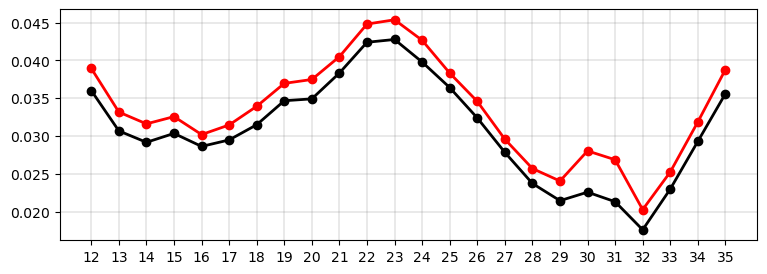

In [92]:
fig = plt.figure(figsize=(9,3))

plt.plot(this_df_with_mode['fhr'].values, this_df_with_mode['bss'], color='red', lw=2, marker='o')
plt.plot(this_df_without_mode['fhr'].values, this_df_without_mode['bss'], color='k', lw=2, marker='o')

#plt.plot(this_df_with_mode_qlcs_area['fhr'], this_df_with_mode_qlcs_area['bss'], color='red', lw=2, marker='o')
#plt.plot(this_df_without_mode_qlcs_area['fhr'], this_df_without_mode_qlcs_area['bss'], color='k', lw=2, marker='o')

plt.grid(color='grey', linewidth=0.25)

#plt.savefig('test.pdf')